#### Welcome to the Parallel C OpenMP hand-on session. 

#### In this Jupyter Notebook, you are provided with four scientific programming tasks that can be accelerated by OpenMP multithreading. Each examples has its own theme in loop-parallelisation and emphasises different strategies.

#### Before we start, install the following package for data-processing. 

In [ ]:
# For processing output data 
pip install pandas

# Exercise 1. (Independent Loop Iterations) Monte-Carlo $\pi$

Given a unit circle enclosed by a unit square, assum $N$ sampling points are generated within the unit square, then the $h$ number of points landing on the circle can result in approximations of value $\pi$:
\begin{align*}
\pi \approx \frac{4h}{N}.
\end{align*}

Clearly, more sampling points produces better approximation. Since each sampling test is independent, makes the Monte-Carlo type of method a standard candidate to demonstrate multitheading parallelisation by OpenMP.



Note that in the python-based Jupyter environment you are working on, we need to prepend lines of code with `!` to indicate we wish to execute a shell command.

In [ ]:
# Compilee the serial code
!gcc -g -Wall -O3 -lm -o monte-carlo-pi-serial monte-carlo-pi-serial.c 

In [26]:
%%time
#Execute the serial code
!./monte-carlo-pi-serial

MATH Pi 3.141593
/////////////////////////////////////////////////////
count 8
Sampling points 10; Hit numbers 8; Approx Pi 3.200000
count 81
Sampling points 100; Hit numbers 81; Approx Pi 3.240000
count 780
Sampling points 1000; Hit numbers 780; Approx Pi 3.120000
count 7828
Sampling points 10000; Hit numbers 7828; Approx Pi 3.131200
count 78403
Sampling points 100000; Hit numbers 78403; Approx Pi 3.136120
count 784943
Sampling points 1000000; Hit numbers 784943; Approx Pi 3.139772
count 7855124
Sampling points 10000000; Hit numbers 7855124; Approx Pi 3.142050
count 78539130
Sampling points 100000000; Hit numbers 78539130; Approx Pi 3.141565
count 785394671
Sampling points 1000000000; Hit numbers 785394671; Approx Pi 3.141579
CPU times: user 105 ms, sys: 21.2 ms, total: 127 ms
Wall time: 9.68 s


### TODO: 
Add the worksharing-loop in monte-carlop-pi-openmp.c. 

In [41]:
# Compile the openmp code
!gcc -fopenmp -g -Wall -O3 -lm -o monte-carlo-pi-openmp monte-carlo-pi-openmp.c 

In [42]:
%%time

# Execute the openmp code, compare the time consumption with the serial version
!OMP_NUM_THREADS=4 ./monte-carlo-pi-openmp

MATH Pi 3.141593
/////////////////////////////////////////////////////
thread 0
thread 3
thread 2
thread 1
openmp walltime 0.000281 seconds
 Sampling points 10; Hit numbers 8; Approx Pi 3.200000
thread 3
thread 0
thread 1
thread 2
openmp walltime 0.000094 seconds
 Sampling points 100; Hit numbers 80; Approx Pi 3.200000
thread 0
thread 3
thread 2
thread 1
openmp walltime 0.000033 seconds
 Sampling points 1000; Hit numbers 768; Approx Pi 3.072000
thread 0
thread 3
thread 2
thread 1
openmp walltime 0.000114 seconds
 Sampling points 10000; Hit numbers 7807; Approx Pi 3.122800
thread 0
thread 3
thread 2
thread 1
openmp walltime 0.000281 seconds
 Sampling points 100000; Hit numbers 78475; Approx Pi 3.139000
thread 0
thread 1
thread 3
thread 2
openmp walltime 0.002235 seconds
 Sampling points 1000000; Hit numbers 785420; Approx Pi 3.141680
thread 0
thread 2
thread 1
thread 3
openmp walltime 0.021984 seconds
 Sampling points 10000000; Hit numbers 7856523; Approx Pi 3.142609
thread 0
thread 3
t

# Exercise #2 (Dynamic Loop Iterations) Mandelbrot Set

The Mandelbrot set is a set of complex numbers $c$ for which the function $f_c(z_{i+1} ) = z_i^2 + c$  does not diverge to infinity when iterated from $z_0 = 0$.

Denote the Mandelbrot set by $M$, it can be written as

  $$ M := \{ c \in \mathbb{C} \big\rvert  z_{i+1} = z_{i}^2 +c <\infty, z_0 =0,\quad i=0, 1,\cdots, N \}$$  

### Convergence Test
Heuristically, the search region of $M$ can be shown to be narrowed into $[-2, 0.47] \times [-1.12, 1.12]i$. Therefore, a uniform mesh is laid over this region to search mandelbrot points.

For each point in the search region, it is tested with 100 iterations of $f_c(z_{i+1})\; i=0,\cdots, 100$. It is also shown that if the values is greater than $4$ than the point is guaranteed to diverge. 

### Dynamic workload
There is no a-priori knowledge of whether a point converges or diverges, as such the loop iteration searching through each point is dynamic: some point may diverge after a few iterations whereas others may exhaust entire 100 iteration, causes a load-balance issue for multi-threads.

Test performance with OpenMP Dynmic Scheduling!
 

Part 1. Compile and run the serial version of mandelbrot set generator.

In [43]:
# Compile the serial code

!gcc -Wall -O3 mandelbrot-serial.c -o mandelbrot-serial

In [44]:
# Execute the serial program 
!./mandelbrot-serial

Resolution #0, Points 100 by 100 
Resolution #1, Points 1000 by 1000 
Resolution #2, Points 10000 by 10000 


time in loading  0.009098529815673828
time in plotting  0.05873465538024902


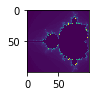

time in loading  0.10138130187988281
time in plotting  0.05897402763366699


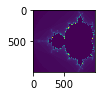

In [13]:
# Plot mandelbrot set to verify outputs
%run  'Mandelbrot-plot.py'

### TODO 
Add work-sharing loop constract and appropriate clauses in mandelbrot-omp-FIXME.c. Make sure that writing into the output file is ordered. 

In [45]:
# Compile the openmp code
!gcc -fopenmp -g -Wall -O3 -o mandelbrot-omp mandelbrot-omp.c 

In [46]:
%%time
# Execute the openmp code

!OMP_NUM_THREADS=4  ./mandelbrot-omp

Resolution #0, Points 100 by 100 
Resolution #1, Points 1000 by 1000 
Resolution #2, Points 10000 by 10000 
CPU times: user 193 ms, sys: 33.5 ms, total: 227 ms
Wall time: 18.1 s


time in loading  0.00858759880065918
time in plotting  0.057821035385131836


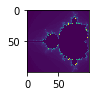

time in loading  0.12176728248596191
time in plotting  0.04041123390197754


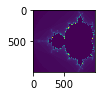

In [18]:
#  Verify the results by plot
%run  'Mandelbrot-plot.py'

You have probably found out that the OpenMP code does not improve the performance as expected. Inspect the source code, note that the loop iteration has to be ordered to avoid undefined output behaviour. 

### TODO 
Modify mandelbrot-split.c to separate the I/O from the calculation routine. 

In [19]:
# compile the openmp code after IO separation
!gcc -fopenmp -g -Wall -O3 -o mandelbrot-split mandelbrot-split.c 


In [21]:
%%time
 
!OMP_NUM_THREADS=4  ./mandelbrot-split

Resolution #0, Points 100 by 100 
openmp walltime 0.000561 seconds
 Time taken 0 seconds 3 milliseconds
Resolution #1, Points 1000 by 1000 
openmp walltime 0.032801 seconds
 Time taken 0 seconds 103 milliseconds
Resolution #2, Points 10000 by 10000 
openmp walltime 2.804449 seconds
 Time taken 6 seconds 243 milliseconds


In [ ]:
# Verify the output again by plot
%run  'Mandelbrot-plot.py'

# Exercise #3 (Loop Dependence). Solve Linear Euqations by Conjugate Gradient Method 

Consider solving a linear equation
\begin{align*}
A\bm{x} = \bm{b}
\end{align*}
where matrix $A \in \mathbf{R}^{n\times n}$ is symmetric positive definite. 

The initial guess $\bm{x}_0$ can be any approximation, we choose $\bm{0}$. The baseline algorithm is statedd as following:

Compute $\bm{r}_0 = \bm{b} - A\bm{x}_0$

For $i= 0, \cdots, n$ Do 

 $\alpha_i := (r_i, r_i)/(Ap_i, p_i)$\;
 
 $x_{i+1}:=x_i+\alpha_i p_i$\;

 $r_{i+1}:=r_i -\alpha_i Ap_i$\;
 
 If $r_{i+1} <\text{tolerance}$ Then Break
 
 $\beta_i:= (r_{i+1}, r_{i+1}) / (r_i, r_i)$\;
 
 $p_{i+1}:= r_{i+1} +\beta_i p_i$

Conjugate Gradient method is a direct method that produces the exact solution at most $n$ steps, however, in practice a tolerance is usually set to terminate iterations.

CG method guarantees convergence for symmetric positive definite matrices in theory.



### Parallelisation in CG method
Note that the for-loop in CG method possesses the dependence between iterations. With multiple threads, the iteration needs to execute only after the dependence is met leading to a non-parallelizable loop. 

That being said, we can still use OpenMP to parallelise part of the code after analysing the bottleneck of its performance!

### Test Matrices
For numerical experiments, we will test two matrices [Trefethen_20](https://www.cise.ufl.edu/research/sparse/matrices/JGD_Trefethen/Trefethen_20.html) and [Msc04515](https://www.cise.ufl.edu/research/sparse/matrices/Boeing/msc04515.html).

Trefethen_20 is a small-sized problem in which you should see a fast convergence.

Msc04515 is a real-life problem arising from a structural engineering. It is a ill-conditioned matrix, which essentially means hard to solve and requires a lot more iterations for CG method if it converges at all.

In [47]:
# Compile the serial code

!gcc -g -Wall -O3 -lm -o cg-std cg-std.c 

In [48]:
# Execute the serial program to solve Trefethen_20 problem
!./cg-std 1e-5 < Trefethen_20.dat

sizes 20 20 158 20 
The norm of the residual calculated directly from the definition of residual: 
iter 0, Res 6.321081
The norm of the residual calculated directly from the definition of residual: 
iter 1, Res 2.891846
The norm of the residual calculated directly from the definition of residual: 
iter 2, Res 1.448373
The norm of the residual calculated directly from the definition of residual: 
iter 3, Res 0.875105
The norm of the residual calculated directly from the definition of residual: 
iter 4, Res 0.462652
The norm of the residual calculated directly from the definition of residual: 
iter 5, Res 0.295934
The norm of the residual calculated directly from the definition of residual: 
iter 6, Res 0.229429
The norm of the residual calculated directly from the definition of residual: 
iter 7, Res 0.144673
The norm of the residual calculated directly from the definition of residual: 
iter 8, Res 0.101493
The norm of the residual calculated directly from the definition of residual: 
i

### TODO
Add appropriate work-sharing loop construct and clauses in cg-std-omp.c

In [4]:
# Compile the openmp code
!gcc -fopenmp -g -Wall -O3 -lm -o cg-std-omp cg-std-omp.c 

In [49]:
%%time
# Verify the numerical result with the serial version
!OMP_NUM_THREADS=4  ./cg-std-omp 1e-5 < Trefethen_20.dat

sizes 20 20 158 20 
The norm of the residual calculated directly from the definition of residual: 
iter 0, Res 6.321081
The norm of the residual calculated directly from the definition of residual: 
iter 1, Res 2.891846
The norm of the residual calculated directly from the definition of residual: 
iter 2, Res 1.448373
The norm of the residual calculated directly from the definition of residual: 
iter 3, Res 0.875105
The norm of the residual calculated directly from the definition of residual: 
iter 4, Res 0.462652
The norm of the residual calculated directly from the definition of residual: 
iter 5, Res 0.295934
The norm of the residual calculated directly from the definition of residual: 
iter 6, Res 0.229429
The norm of the residual calculated directly from the definition of residual: 
iter 7, Res 0.144673
The norm of the residual calculated directly from the definition of residual: 
iter 8, Res 0.101493
The norm of the residual calculated directly from the definition of residual: 
i

In [51]:
%%time
# Excute the parallel code to solve Boeing msc04515 problem. You may also want to attempt this problem with the serial code

!OMP_NUM_THREADS=4 ./cg-std-omp 1e-5 < msc04515.dat

sizes 4515 4515 97707 4515 
The norm of the residual calculated directly from the definition of residual: 
iter 0, Res 21944.455138
The norm of the residual calculated directly from the definition of residual: 
iter 1, Res 28592.779057
The norm of the residual calculated directly from the definition of residual: 
iter 2, Res 49129.092762
The norm of the residual calculated directly from the definition of residual: 
iter 3, Res 75042.131133
The norm of the residual calculated directly from the definition of residual: 
iter 4, Res 93028.311499
The norm of the residual calculated directly from the definition of residual: 
iter 5, Res 105825.460692
The norm of the residual calculated directly from the definition of residual: 
iter 6, Res 127122.263177
The norm of the residual calculated directly from the definition of residual: 
iter 7, Res 167549.814336
The norm of the residual calculated directly from the definition of residual: 
iter 8, Res 229288.519304
The norm of the residual calcula

# Exercise #4 (Parallelisaton vs. Convergence Rate): Solve Finite Difference Discretised Poisson Equation by Jacobi and Gauss-Seidel Methods


### Model Problem
Consider a 2D Poisson equation with Dirichlet boundary condition over a unit square domain $\Omega = [0,1] \times [0,1]$

\begin{align*}
-\Delta u &= f \; \text{in} \; \Omega \\
 u &= g \; \text{on} \; \partial \Omega
\end{align*}

Define a uniform partition of the domain $\Omega$ with nodal points at which the solution of the Poisson equation is sampled. Let $h$ be the uniform distance between two nodal points then the nodal points that lie on the mesh are defined by

\begin{align*}
x_i = i h, \; y_j = j h\qquad i,j = 0,\cdots, N
\end{align*}
where $N$ is a given mesh size and $i, j$ are integers along $x, y$-axis telling the location of each nodal point.  


### Discretisation
We use the second-order central finite difference method to discretise the Laplace operator
 \begin{align*}
     \big(\Delta u)\big)_{i,j} & = \big(D_{xx}^2u\big)_{i,j}+ \big(D_{yy}^2 u\big)_{i,j}\\[2ex]
     & \approx \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h^2} + \frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{h^2} 
 \end{align*}

leading to
\begin{align}
    -\big(\Delta u)\big)_{i,j} = \frac{4u_{i,j}-u_{i+1,j}-u_{i-1,j}-u_{i,j+1}-u_{i,j-1}}{h^2}=f(u_{i,j}).
\end{align}

The above finite-difference formula can further be represented by a five-point stencil matrix built in the mesh
\begin{align*}S = 
    \begin{pmatrix}
    & -1 & \\
    -1 & 4 &-1\\
    & -1 &
    \end{pmatrix}.
\end{align*}

Impose the Dirichlet boundary condition, on the interior nodal points the discretisation can be written as a linear equation

\begin{align*}
A \bm{u} = \bm{f}, \qquad A=\frac{1}{h^2}
    \begin{pmatrix}
S & I \\
I & S & I \\
& I & \ddots & \ddots \\
& & \ddots & \ddots & I \\
& & & I & S
\end{pmatrix}
\end{align*}
where $A \in \mathbb{R}^{(N-2)^2 \times (N-2)^2}$, $\bm{u} \in \mathbb{R}^{(N-2)^2}$ and $\bm{f} \in \mathbb{R}^{(N-2)^2}$.

Note that with the five-point stencil, the matrix $A$ was never assembled and is nowhere in sight! 


### Numerical Solvers

To solve the linear system, two iterative methods are used and compared. 

$\textbf{Jacobi method}$

\begin{align*}
\bm{u}^{(k+1)} = D^{-1}( \bm{f} - L\bm{u}_{k} -U\bm{u}_k),
\end{align*}
where $D, L, U$ are the diagonal matrix, lower triangular matrix and upper triangular matrix of $A$, respectively.
Write into stecil,
\begin{align*}
u^{(k+1)}_{ij} = (h^2 f_{ij} + u^{(k)}_{i-1,j} +u^{(k)}_{i+1,j} + u^{(k)}_{i, j-1}+u^{(k)}_{i,j+1})/4 \qquad i,j = 1,\cdots, N-1 
\end{align*} 



$\textbf{Gauss-Seidel method}$ follows a similar scheme:

\begin{align*}
\bm{u}^{(k+1)} = D^{-1} (\bm{f} - L \bm{u}_{k+1}- U \bm{u}_k),
\end{align*}

Note that Gauss-Seidel method uses the most recent estimate to update.
 
Likewise, applying the Gauss-Seidel method doesn't require assembling $D, L, U$ matrices for finite-difference discretised Laplacian. 
Elementwise, we have 
\begin{align*}
u^{(k+1)}_{ij} = (h^2 f_{ij} + u^{(k)}_{i-1,j} +u^{(k+1)}_{i+1,j} + u^{(k+1)}_{i, j-1}+u^{(k)}_{i,j+1})/4 \qquad i,j = 1,\cdots, N-1 
\end{align*}

### Convergence Rate

Gauss Seidel method is known to be faster than Jacobi method (twice faster as stated in some textbooks), both of their convergence rate for our application is governed by the following theorem.

$\textbf{Theorem}\;$
The convergence rate of Jacobi and Gauss-Seidel method for the 5-point stencil finite difference method of the Poisson equation on a uniform mesh with size $h$ is
\begin{align*}
1- \mathcal{O}(h^2)
\end{align*}

As such, the convergence rate stalls as the mesh gets finer. To alleviate the shortcoming of the numerical method, let's try improving the perforance by OpenMP! 

In [65]:
# Compile the serial code
!gcc -g -Wall -O3 -lm -o fd_laplace-serial fd_laplace-serial.c 

In [66]:
# Execute the serial code with Jacobi method to solve on a grid of 300 x 300 meshes i.e. matrix size 90000 x 90000 at stopping criterion 1e-5.
!./fd_laplace-serial 300 1e-5 Jacobi

Jacobi METHOD IS IN USE 
Residual after 100 iteratio: 2934.7670898438
Residual after 200 iteratio: 2918.6120605469
Residual after 300 iteratio: 2902.5458984375
Residual after 400 iteratio: 2886.5681152344
Residual after 500 iteratio: 2870.6782226562
Residual after 600 iteratio: 2854.8757324219
Residual after 700 iteratio: 2839.1604003906
Residual after 800 iteratio: 2823.5314941406
Residual after 900 iteratio: 2807.9887695312
Residual after 1000 iteratio: 2792.5314941406
Residual after 1100 iteratio: 2777.1594238281
Residual after 1200 iteratio: 2761.8718261719
Residual after 1300 iteratio: 2746.6684570312
Residual after 1400 iteratio: 2731.5485839844
Residual after 1500 iteratio: 2716.5122070312
Residual after 1600 iteratio: 2701.5585937500
Residual after 1700 iteratio: 2686.6870117188
Residual after 1800 iteratio: 2671.8974609375
Residual after 1900 iteratio: 2657.1894531250
Residual after 2000 iteratio: 2642.5622558594
Residual after 2100 iteratio: 2628.0156250000
Residual after 220

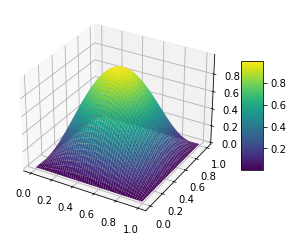

In [71]:
#  Verify the results by plot
%run  'Laplace-plot.py'

In [67]:
# Compile the parallel code

!gcc -fopenmp -g -Wall -O3 -lm -o fd_laplace-omp fd_laplace-omp.c 

In [68]:
# Execute the parallel code with Jacobi method to solve on a grid of 300 x 300 meshes i.e. matrix size 90000 x 90000 at stopping criterion 1e-5.

!OMP_NUM_THREADS=4 ./fd_laplace-omp 300 1e-5 Jacobi

Jacobi METHOD IS IN USE 
Residual after 100 iteratio: 2934.7670898438
Residual after 200 iteratio: 2918.6120605469
Residual after 300 iteratio: 2902.5458984375
Residual after 400 iteratio: 2886.5681152344
Residual after 500 iteratio: 2870.6782226562
Residual after 600 iteratio: 2854.8757324219
Residual after 700 iteratio: 2839.1604003906
Residual after 800 iteratio: 2823.5314941406
Residual after 900 iteratio: 2807.9887695312
Residual after 1000 iteratio: 2792.5314941406
Residual after 1100 iteratio: 2777.1594238281
Residual after 1200 iteratio: 2761.8718261719
Residual after 1300 iteratio: 2746.6684570312
Residual after 1400 iteratio: 2731.5485839844
Residual after 1500 iteratio: 2716.5122070312
Residual after 1600 iteratio: 2701.5585937500
Residual after 1700 iteratio: 2686.6870117188
Residual after 1800 iteratio: 2671.8974609375
Residual after 1900 iteratio: 2657.1894531250
Residual after 2000 iteratio: 2642.5622558594
Residual after 2100 iteratio: 2628.0156250000
Residual after 220

In [ ]:
#  Verify the results by plot
%run  'Laplace-plot.py'

In [69]:
# Execute the parallel code with Gauss-Seidel method to solve on a grid of 300 x 300 meshes i.e. matrix size 90000 x 90000 at stopping criterion 1e-5.

!OMP_NUM_THREADS=4 ./fd_laplace-omp 300 1e-5 Gauss-Seidel

Gauss-Seidel METHOD IS IN USE   
 Residual after 100 iteratio: 2928.3906250000
Residual after 200 iteratio: 2896.2453613281
Residual after 300 iteratio: 2864.4514160156
Residual after 400 iteratio: 2833.0061035156
Residual after 500 iteratio: 2801.9057617188
Residual after 600 iteratio: 2771.1467285156
Residual after 700 iteratio: 2740.7250976562
Residual after 800 iteratio: 2710.6374511719
Residual after 900 iteratio: 2680.8798828125
Residual after 1000 iteratio: 2651.4489746094
Residual after 1100 iteratio: 2622.3413085938
Residual after 1200 iteratio: 2593.5529785156
Residual after 1300 iteratio: 2565.0805664062
Residual after 1400 iteratio: 2536.9208984375
Residual after 1500 iteratio: 2509.0700683594
Residual after 1600 iteratio: 2481.5251464844
Residual after 1700 iteratio: 2454.2824707031
Residual after 1800 iteratio: 2427.3388671875
Residual after 1900 iteratio: 2400.6911621094
Residual after 2000 iteratio: 2374.3359375000
Residual after 2100 iteratio: 2348.2700195312
Residual 

In [ ]:
#  Verify the results by plot
%run  'Laplace-plot.py'